# Chapter 5. Convolutional Neural Networks

## 💸 Review

Linear Layer + Nonlinear Layer -> Neural Network

NN can solve "Mode Problem" - 다양한 종류 분류하기 위해 중간 단계 학습

CNN: Convolutional. 공간적 구조(차원) 유지

## 💸 A bit of history..

- 1957
    - Frank Rosenblatt - Mark I Perceptron machine: The first implementation of the perceptron algorithm
    
- 1960
    - Widor & Hoff - Adaline and Madaline: The first Multilayer Perceptron Network (no Backpropagation)
    
- 1986
    - Rumehart: The first backpropagation, chain rule, update rule. The concept of "training network"
    
- 2006
    - Geoff Hinton & Ruslan Salakhutdinov: DNN
    
- 2010
    - Hintin Lab: NN is good at Speech Recognition 
    
- 2012 *Remarkable Paper*
    - Hintin Lab: "Imagenet classification with deep convolutional neural networks"
        - Imagenet Classification에서 NN 사용
        
- Alexnet: Imagenet error 감소시킴

- 1980 Necognitron: Simple/Complex Cells의 아이디어를 이용한 최초의 NN
    - Fukishima: simple/complex cells 교차시킴
    - Simple cells: modifiable parameters 가지고 있음
    - Complex Cells: perform pooling, 작은 변화에 강인함


- 1998 Init NN: Gradient-Based Learning & Backprob
    - 문서 인식, zipcode 인식

- *NOW* 현재의 NN
    - Image Classification
    - Image Detection
    - Image Segmentation: Detection + Labeling on every each pixels -> useful on self-driving car
    - Image Captioning
    - Pose Recognition
    - Self Transfer
    - Everywhere..

## 💸 Convoultional Neural Networks - First Without the Brain Stuff

### Fully Connected Layer

*32x32x3 image -> stretch to 3027x1*


- input: 32x32x3 image

- weight matrix Wx: 10x3072 weights

- activation(output of the layer): 1x10
    - get 1 value: Neuron의 한 값
        - 1 number: the result of taking a dot product between a row of W and the input (a 3072-dim dot product)
    - 10개의 출력이 존재함

each neuron looks at the full input volume


### Convolution Layer

*32x32*3 image* -> **preserve** spatial structure

FC Layer과의 차이점: CNN은 기존의 구조를 보존시킬 수 있음

- input: 32x32x3 image

- filter(weight): 5x5x3 
    - Convolve the filter with the image
    - slide over the image spatially, computing dot products
    - filters always extend the full deptu of the input volume - 둘 다 세 번째 dim의 값이 3, dept만큼 확장됨
    
$$W^Tx+ b$$
- to transpose W: stretch out $W$ to the long Vector

- 32x32x3 image * 5x5x3 filter dot product -> 1x28x28 activation map
    - activation map과 input image의 차원이 다를 수 있음 - slide를 어떻게 하느냐에 따라 달라짐

- Convolution Layer에서 여러 개의 filter 사용 -> 필터마다 다른 특징 추출
    - 다른 filter 사용하면 앞서 계산한 activation map과 같은 size의 new activation map 만들어짐
    - 원하는 만큼 여러 개의 filter 사용 가능
    
    - For example, 우리가 6개의 5x5 filters 가지고 있다 -> 우리는 6개의 separate activation maps 가짐
        - stack these up to get a new image of size 28x28x6
        
        
- **Conv Pool 쌓아 올림 - 마지막에 FC Layer**

### Preview

ConvNet is a sequence of Convolution Layers, interspersed with activation functions

dept would be the num of filters that we have

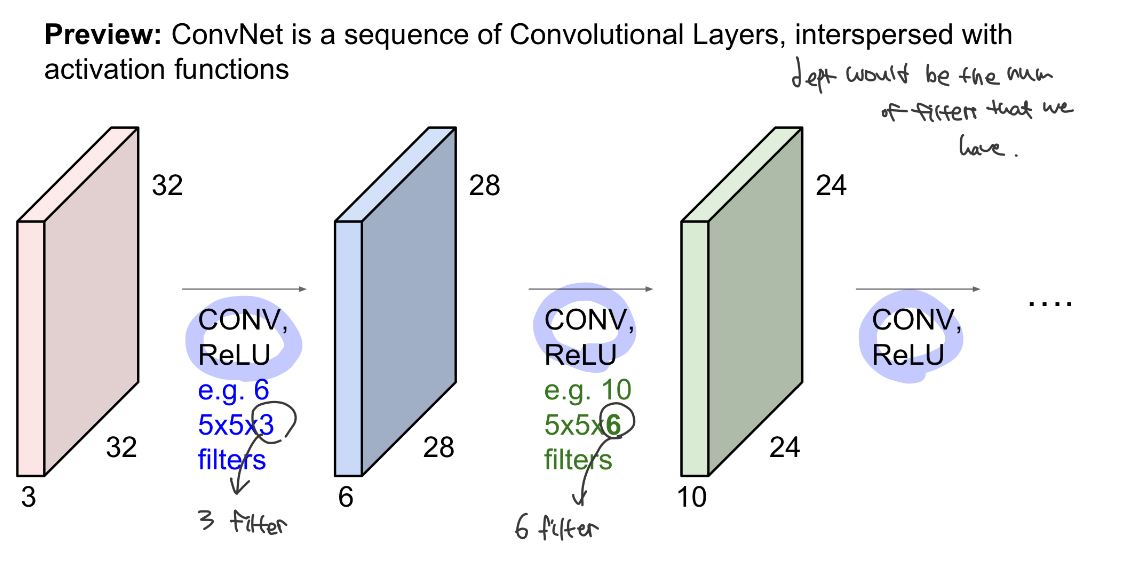

Linear Layer로 된 Neural Network

사이에 Activation function(ReLu..)

-> Conv-Relu 반복, Pooling Layer 가끔 넣음

- output of each layer -> input of next layer

- Layer 여러 가지 필터 가지고 있음: 각 필터마다 다른 output map 만듦
    - **One Filter, One Activation Map**

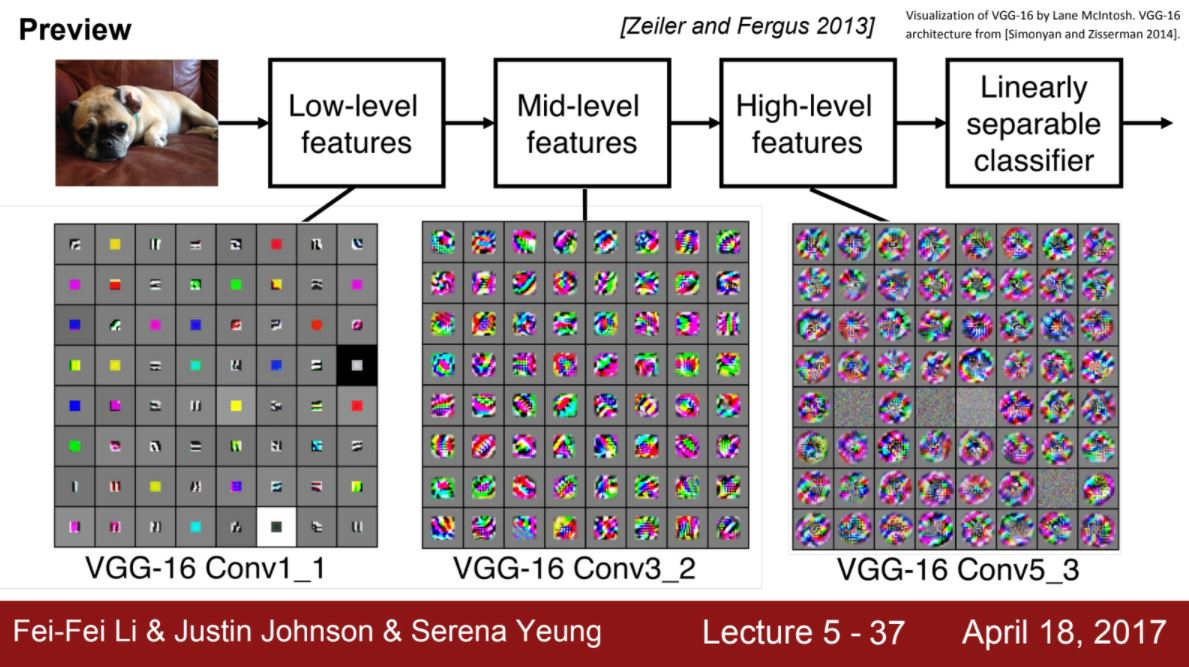

- 여러 개의 Layer 쌓음 -> 필터들이 계층적으로 학습하는 모습
    - top: low level feature(edge)
    - middle: mid-level features(blobs..)
    - bottom: high-level features(more likely)
    
- Layer의 계층에 따라 서로 다른 복잡도/단순도의 특징 존재

We call the layer convolutional because it is related to convolution of two signals

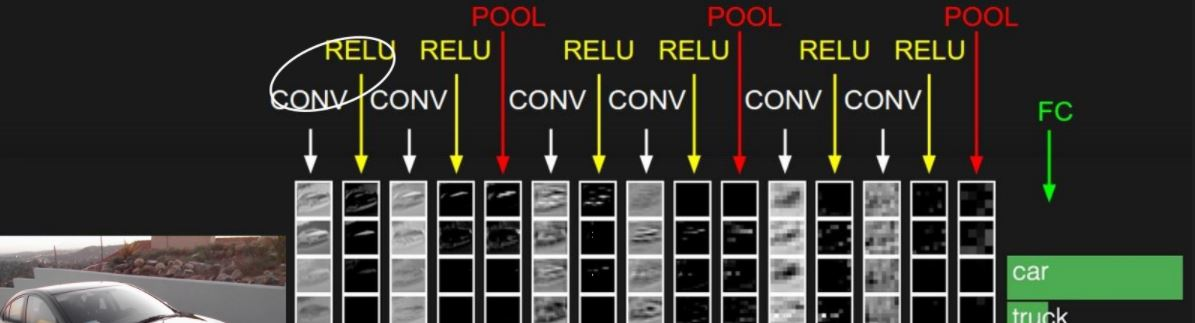

*pooling*: activation maps의 사이즈를 줄임

*FC Layer*: compute final score, conneted with every layers at output of the last CNN

### Spatial Dimensions

- 7x7 input(spatially) assume 3x3 filter -> 5x5 output
    - with stride 2 -> 3x3 output
    - with stride 3 -> doesn't fit
    - with stride 1, pad with 1 pixel border -> 7x7 output
    
**output size: $$(N - F + 2*P)/stride + 1$$**



*shrinking too fast is not good, doesn't work well*

- input volume: 32x32x3
- filters: 10 5x5 filters with stride 1, pad 2

- *Output Volume Size*: ((32 + 2 * 2 - 5) / 1 + 1) * 10
- *Number of Parameters*: (5 * 5 * 3 + 1) * 10

1 for bias

- 5 * 5 filter -> 5 * 5 receptive field for each neuron
    - there will be 5 different neurons all looking at the same region in the input volume

### Pooling Layer

makes the representation smaller and more manageable

operates over each activation map indepently

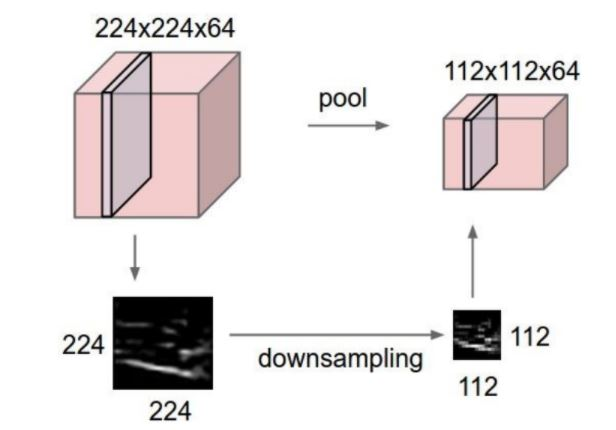

CNN: Conv Layer & Pooling Layer & other nonlinear computation

- representation 작 -> parameter 작 -> invaiance 

- downsampling 함 -> 공간적으로 줄었지만 dept에는 영향 주지 않음
    - downsampling 하고 싶을 때는 *pooling* 섞어 줌

*Filter Size 정할 수 있음 -> 한 번에 얼마큼의 영역 묶을지 정함*

- padding 잘 하지 않음, downsampling만 고려

- 자주 쓰는 filter size: 2x2, 3x3
- 자주 쓰는 stride: 2

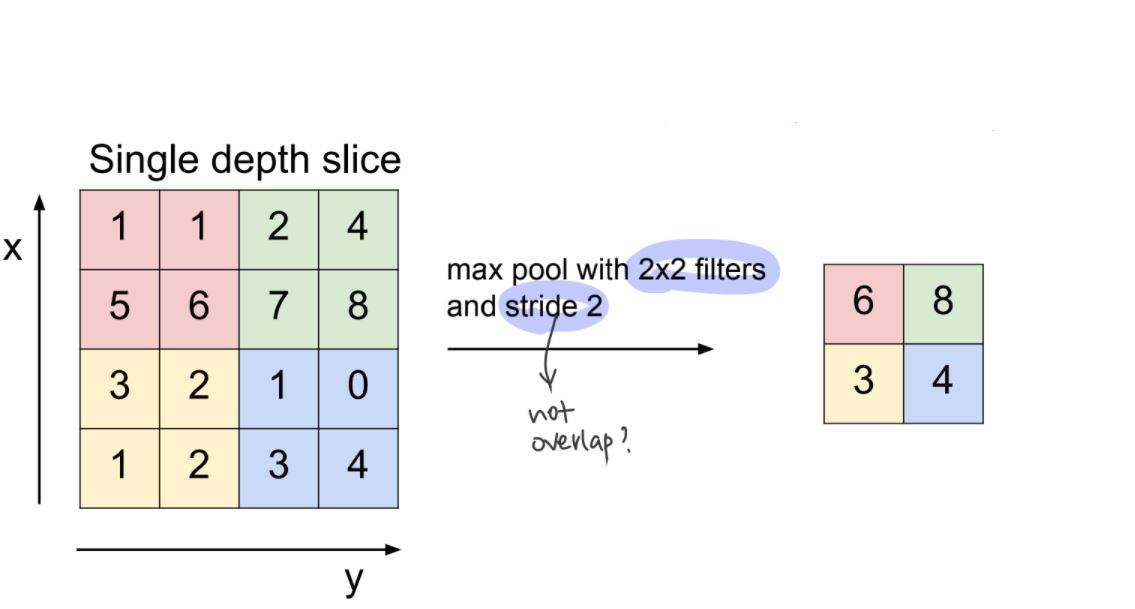

**Max Pooling**

이 example에서 stride = 2

sliding하면서 computation -> 내적X 
**Maximum**값 고름

- *어떤 신호에 대해 얼마나 필터가 activate되었는지 알 수 있음*
    - value: show how activate the neuron is
    
- where < how big

### FC Layer

output of final Conv Layer: 3 dim volume -> stretch to make 1-dim vector -> use as input of FC Layer

-> every output of ConvNet Layer is connected!

- final Layer: don't care about spatial structure
    - 최종 추론 - Score Output